In [7]:
%pip install statsmodels --upgrade

In [12]:
from scipy.stats import poisson
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 準備資料
* weekday：星期一(0), 星期二(1),..., 星期日(6)
* weekend：不是周末(0), 是周末(1)
* unit_sales：銷售數量

In [6]:
df = pd.read_csv('Lec7 raw_data.csv')
df.head()

,weekday,weekend,unit_sales
0,2,0,0
1,3,0,6
2,4,0,2
3,5,1,3
4,6,1,1


## 訓練變數為 weekday(Day of Week)

### 訓練模型並得到參數

In [15]:
# 訓練變數為 weekday(Day of Week)
train_data = df.copy()
X_train = train_data[['weekday']]
y_train = train_data[['unit_sales']]

# 新增截距項
X_train['Intercept'] = 1

# dummies variables
X_train = pd.get_dummies(X_train, columns=['weekday']).iloc[:, :-1]
X_train = X_train.astype(float)

<ipython-input-15-3e8ce87328e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Intercept'] = 1


In [19]:
# 訓練poisson regression模型
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [17]:
X_train

,Intercept,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
360,1.0,0.0,0.0,0.0,0.0,0.0,1.0
361,1.0,0.0,0.0,0.0,0.0,0.0,0.0
362,1.0,1.0,0.0,0.0,0.0,0.0,0.0
363,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# 模型結果
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             unit_sales   No. Observations:                  365
Model:                            GLM   Df Residuals:                      358
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -632.57
Date:                Tue, 26 Nov 2024   Deviance:                       499.65
Time:                        03:22:57   Pearson chi2:                     450.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09729
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0377      0.136      0.277      0.782      -0.229       0.304
weekday_0      0.8313      0.163      5.099      0.000       0.512       1.151
weekday_1      0.4654      0.174      2.680      0.007       0.125       0.806
weekday_2      0.7795      0.164      4.757      0.000       0.458       1.101
weekday_3      0.6162      0.169      3.649      0.000       0.285       0.947
weekday_4      0.7295      0.166      4.403      0.000       0.405       1.054
weekday_5      0.5649      0.170      3.315      0.001       0.231       0.899
==============================================================================
"""

In [23]:
poisson_pred = poisson_model.predict(X_train)
poisson_pred[0:13]

,0
0,2.264151
1,1.923077
2,2.153846
3,1.826923
4,1.038462
5,2.384615
6,1.653846
7,2.264151
8,1.923077
9,2.153846


In [24]:
np.exp(0.0377+0.6162)

1.923026024891528

In [25]:
# 將預測結果放入poisson_pred_df
poisson_pred_df = pd.DataFrame(poisson_pred, columns=['pred'])
poisson_pred_df['weekday'] = train_data['weekday'].values

# 參數
poisson_pred_df[:10]

,pred,weekday
0,2.264151,2
1,1.923077,3
2,2.153846,4
3,1.826923,5
4,1.038462,6
5,2.384615,0
6,1.653846,1
7,2.264151,2
8,1.923077,3
9,2.153846,4


In [26]:
# 訓練 benchmark 模型(訓練變數只有截距項)
benchmark_model = sm.GLM(y_train, X_train['Intercept'], family=sm.families.Poisson()).fit()
benchmark_pred = benchmark_model.predict(X_train['Intercept'])

In [27]:
benchmark_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             unit_sales   No. Observations:                  365
Model:                            GLM   Df Residuals:                      364
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -651.25
Date:                Tue, 26 Nov 2024   Deviance:                       537.00
Time:                        03:23:47   Pearson chi2:                     478.
No. Iterations:                     5   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6382      0.038     16.777      0.000       0.564       0.713
==============================================================================
"""

In [28]:
benchmark_pred

,0
0,1.893151
1,1.893151
2,1.893151
3,1.893151
4,1.893151
...,...
360,1.893151
361,1.893151
362,1.893151
363,1.893151


In [29]:
np.exp(0.6382)

1.8930702841786766

### PMF

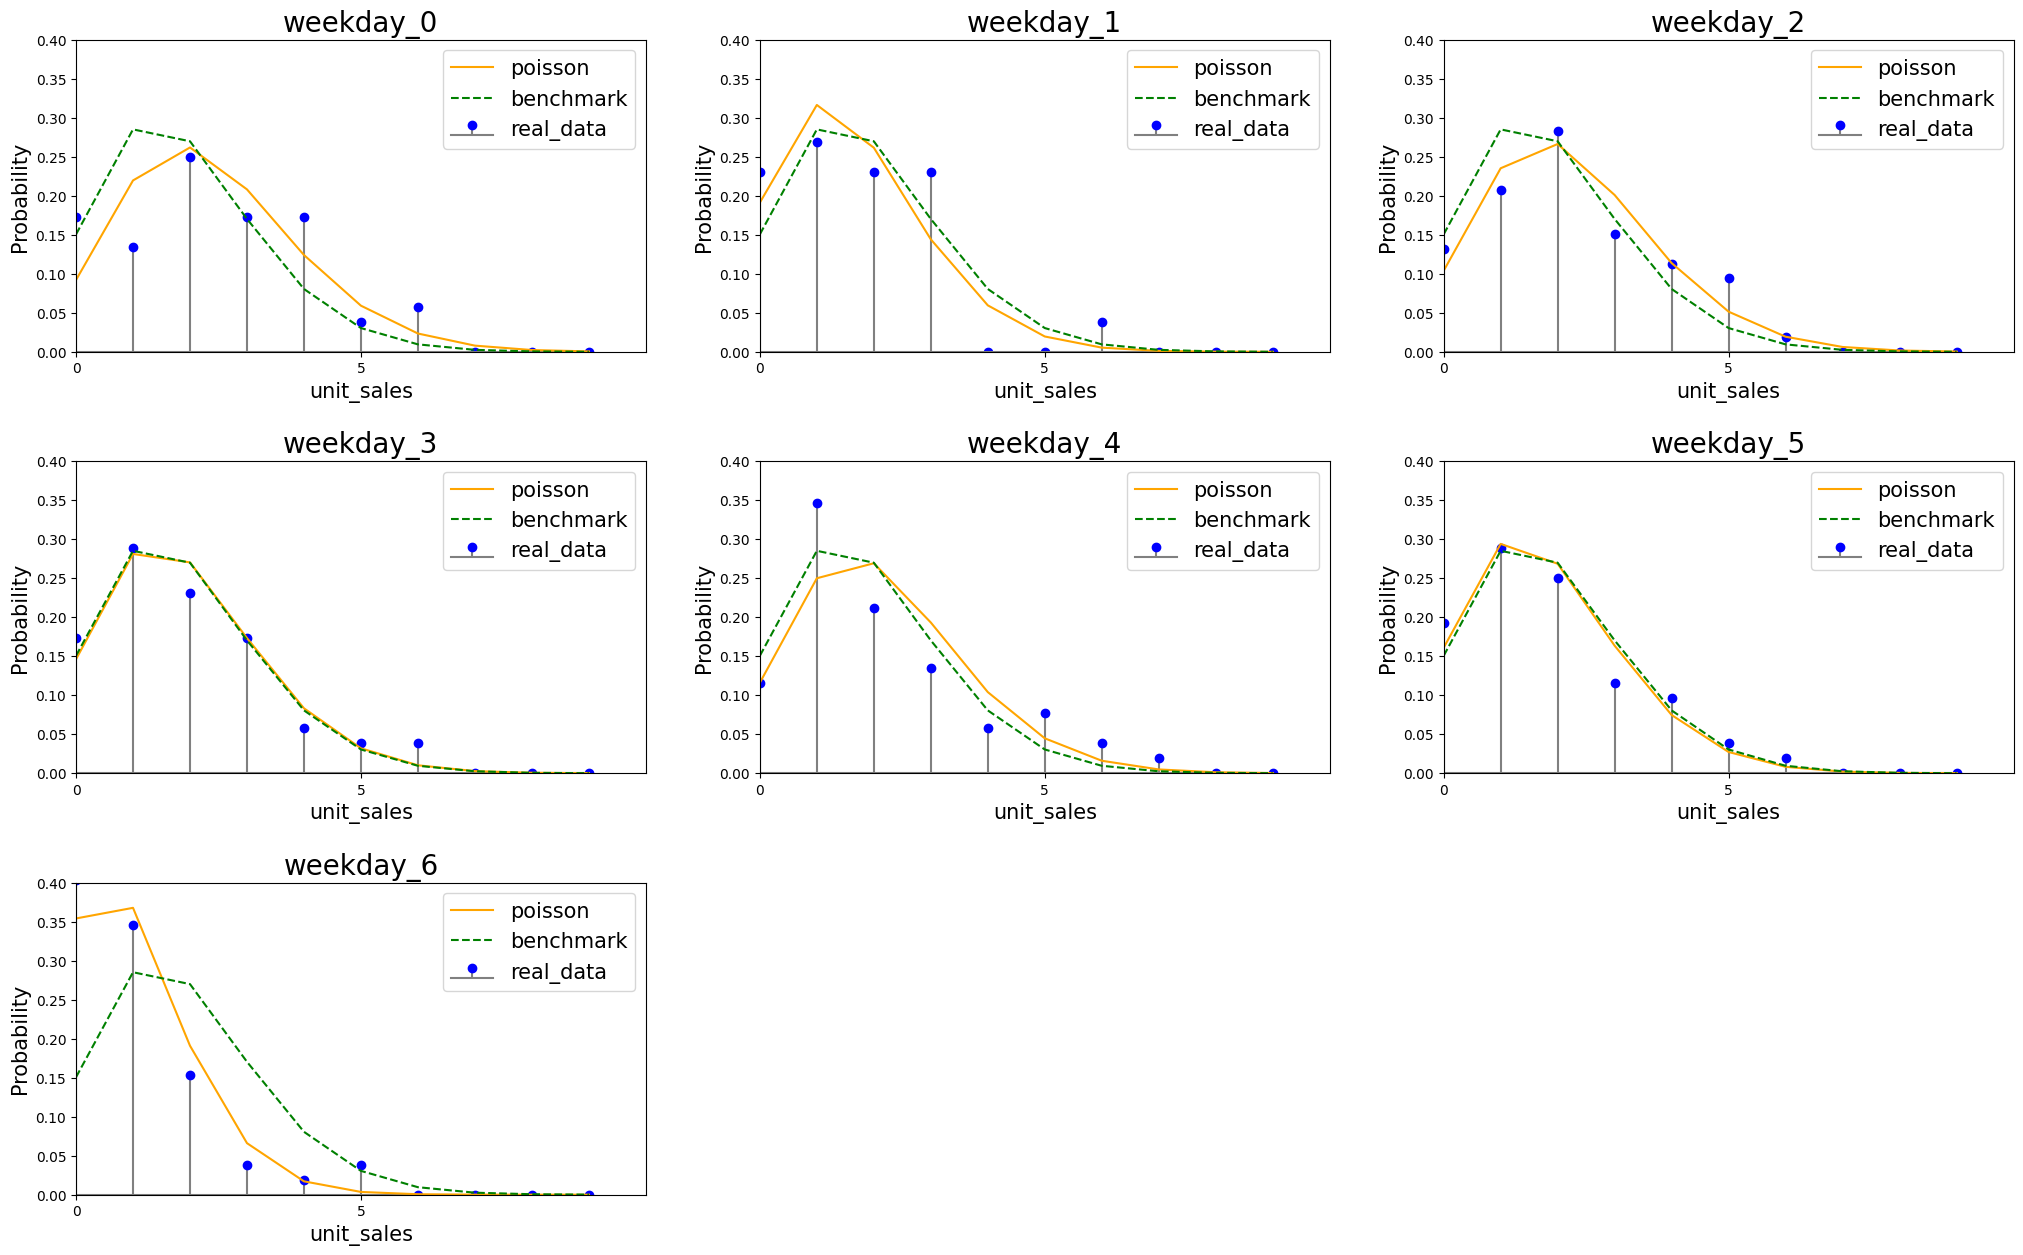

In [32]:
# show fitness to training data by weekday
min_x = 0
max_x = 10
X = list(range(min_x, max_x))
X_train = X_train.astype(float)
i = 1
plt.figure(figsize=(25, 15))
for weekday in range(7):
    plt.subplot(3, 3, i)

    # 真實機率分布
    real_data = list(train_data['unit_sales'].loc[train_data['weekday']==weekday])
    real_pmfs = []
    for x in X:
        real_pmfs.append(real_data.count(x)/len(real_data))
    plt.stem(X, real_pmfs, linefmt='grey', markerfmt='bo', basefmt='grey', label='real_data')

    # poisson
    pred = poisson_pred_df['pred'].loc[(poisson_pred_df['weekday']==weekday)].head(1)

    plt.plot(X, poisson.pmf(X, pred), 'orange', label='poisson')
    plt.plot(X, poisson.pmf(X, benchmark_pred[0]), 'g--', label='benchmark')
    plt.title('weekday_{}'.format(weekday), fontsize=20)
    plt.xlabel('unit_sales', fontsize=15)
    plt.ylabel('Probability', fontsize=15)
    plt.xticks(list(range(min_x, max_x, 5)))
    plt.xlim(min_x, max_x)
    plt.ylim(0, 0.4)
    plt.legend(fontsize=15)

    i += 1

plt.subplots_adjust(wspace=0.2,
                        hspace=0.35)

## 訓練變數只有 Weekend

### 訓練模型並得到參數

In [34]:
# 訓練變數為 weekend
train_data = df.copy()
X_train = train_data[['weekend']]
y_train = train_data[['unit_sales']]

# 新增截距項
X_train['Intercept'] = 1

# dummies variables
X_train = pd.get_dummies(X_train, columns=['weekend']).iloc[:, :-1]
X_train = X_train.astype(float)

# 訓練poisson regression模型
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
poisson_pred = poisson_model.predict(X_train)

# 將預測結果放入poisson_pred_df
poisson_pred_df = pd.DataFrame(poisson_pred, columns=['pred'])
poisson_pred_df['weekend'] = train_data['weekend'].values


<ipython-input-34-b5b3a14f3d18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Intercept'] = 1


In [35]:
# 模型結果
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             unit_sales   No. Observations:                  365
Model:                            GLM   Df Residuals:                      363
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -645.89
Date:                Tue, 26 Nov 2024   Deviance:                       526.28
Time:                        03:28:36   Pearson chi2:                     469.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02894
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4018      0.086      4.686      0.000       0.234       0.570
weekend_0      0.3040      0.096      3.178      0.001       0.117       0.492
==============================================================================
"""

In [36]:
# 參數
poisson_pred_df[:10]

,pred,weekend
0,2.025547,0
1,2.025547,0
2,2.025547,0
3,1.494505,1
4,1.494505,1
5,2.025547,0
6,2.025547,0
7,2.025547,0
8,2.025547,0
9,2.025547,0


### PMF

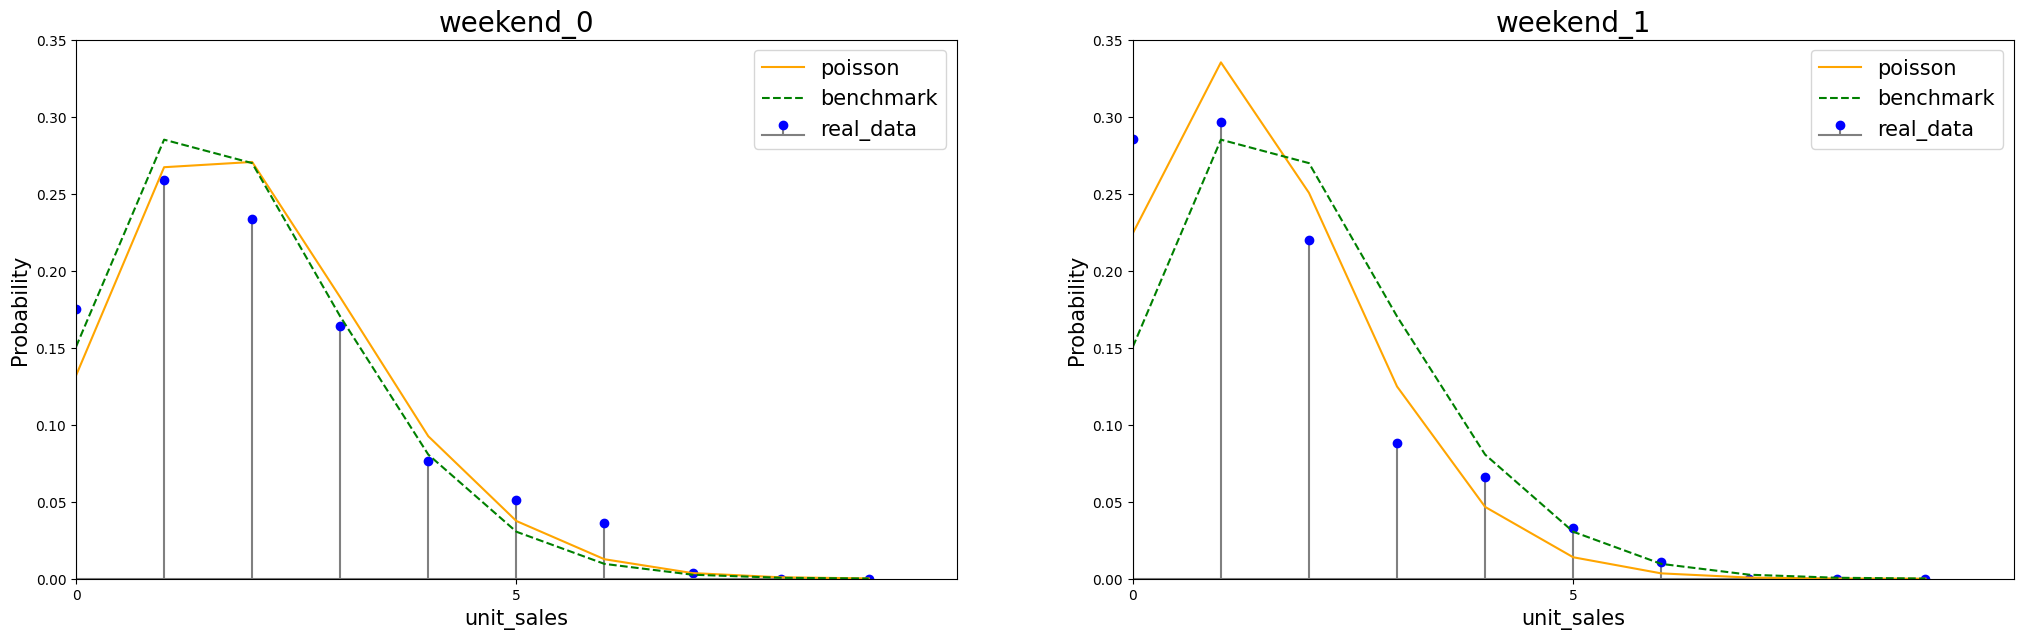

In [37]:
# show fitness to training data by weekend
min_x = 0
max_x = 10
X = list(range(min_x, max_x))

i = 1
plt.figure(figsize=(25, 7))
for weekend in range(2):
    plt.subplot(1, 2, i)

    # 真實機率分布
    real_data = list(train_data['unit_sales'].loc[train_data['weekend']==weekend])
    real_pmfs = []
    for x in X:
        real_pmfs.append(real_data.count(x)/len(real_data))
    plt.stem(X, real_pmfs, linefmt='grey', markerfmt='bo', basefmt='grey', label='real_data')

    # poisson
    pred = poisson_pred_df['pred'].loc[(poisson_pred_df['weekend']==weekend)].head(1)

    plt.plot(X, poisson.pmf(X, pred), 'orange', label='poisson')
    plt.plot(X, poisson.pmf(X, benchmark_pred[0]), 'g--', label='benchmark')
    plt.title('weekend_{}'.format(weekend), fontsize=20)
    plt.xlabel('unit_sales', fontsize=15)
    plt.ylabel('Probability', fontsize=15)
    plt.xticks(list(range(min_x, max_x, 5)))
    plt.xlim(min_x, max_x)
    plt.ylim(0, 0.35)
    plt.legend(fontsize=15)

    i += 1

plt.subplots_adjust(wspace=0.2,
                        hspace=0.35)